In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import random

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    
set_seed(42)

In [3]:
df = pd.read_csv("/kaggle/input/multiclass-diabetes-dataset/Multiclass Diabetes Dataset/Multiclass Diabetes Dataset.csv")
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


In [5]:
df.isnull().sum()

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
Class     0
dtype: int64

In [6]:
df.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,49.522727,5.671515,85.806818,6.862727,4.594394,2.151894,1.182879,2.530871,1.479167,26.626856,1.121212
std,0.498875,10.127301,4.002837,99.400047,2.544604,1.289062,1.265841,0.455591,1.000173,3.099856,5.093652,0.914857
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.000000,0.600000,0.400000,0.300000,0.200000,19.000000,0.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.875000,1.300000,0.900000,1.800000,0.675000,23.000000,0.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000,1.000000
75%,1.000000,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000,2.000000
max,1.000000,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000,2.000000


In [7]:
df.isnull().sum()

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
Class     0
dtype: int64

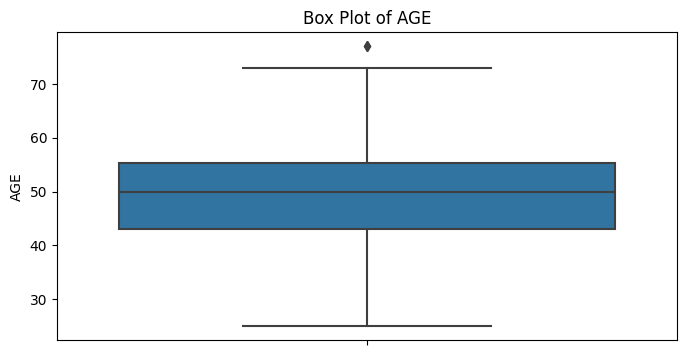

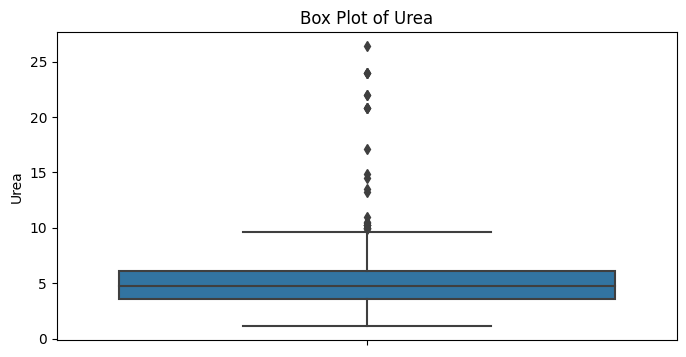

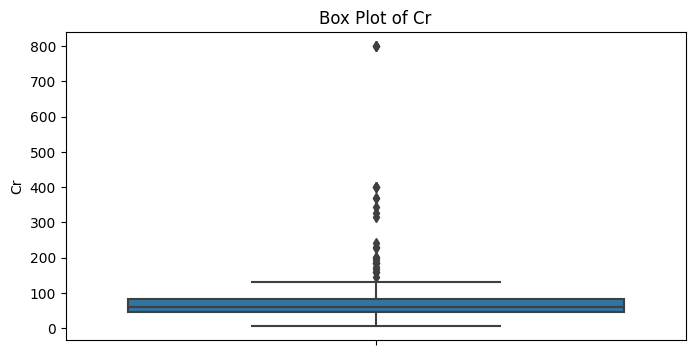

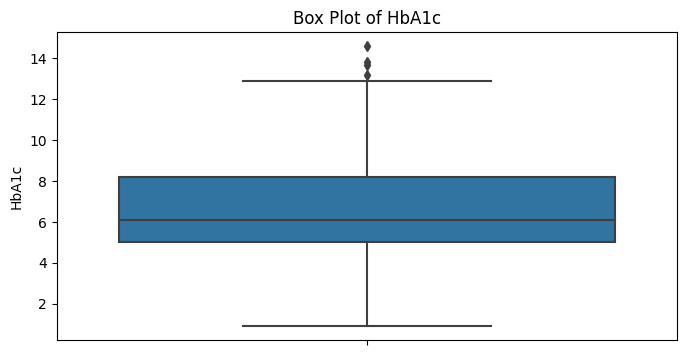

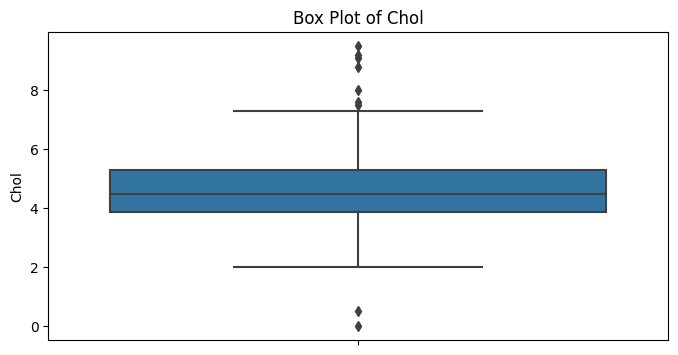

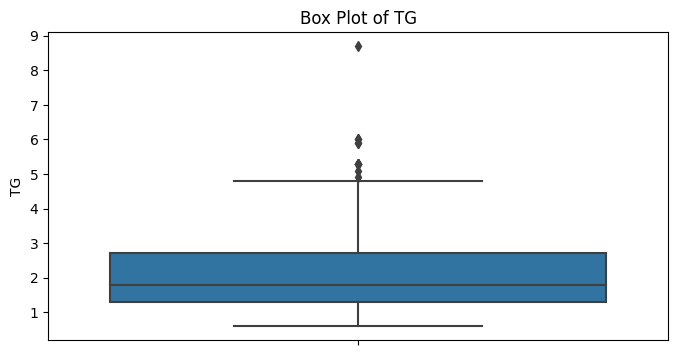

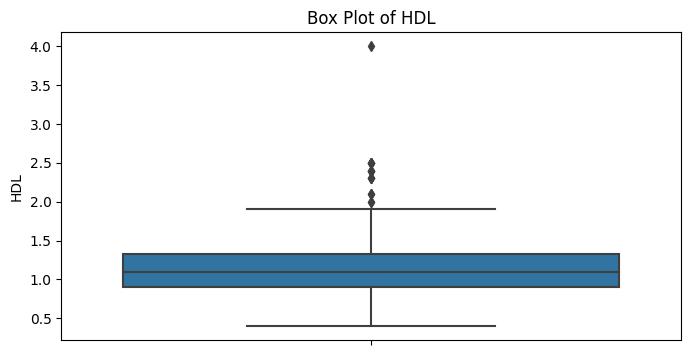

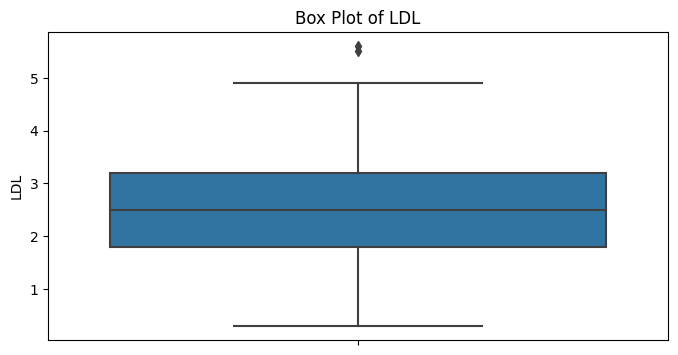

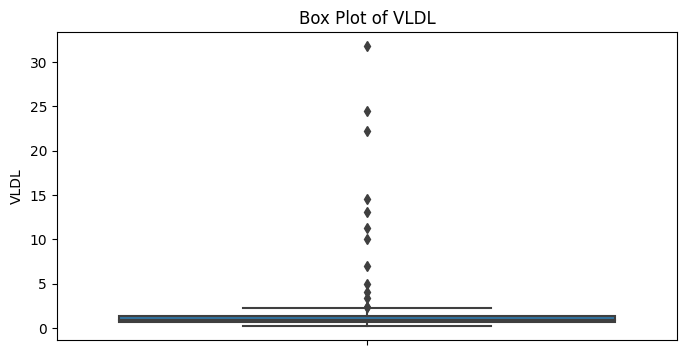

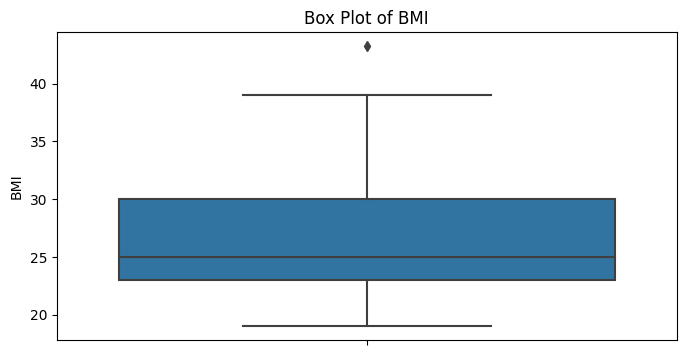

In [8]:
for column in ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [9]:
df['Gender'].value_counts()

Gender
1    144
0    120
Name: count, dtype: int64

In [10]:
df['Class'].value_counts()

Class
2    128
0     96
1     40
Name: count, dtype: int64

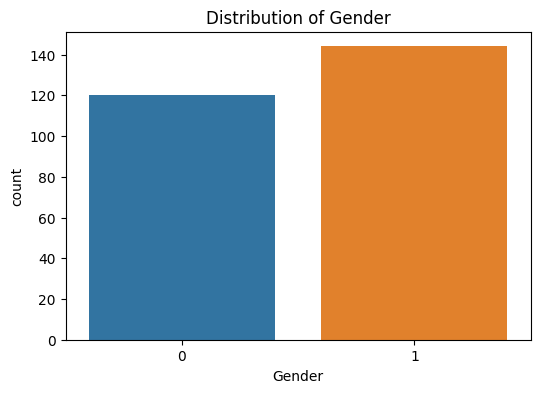

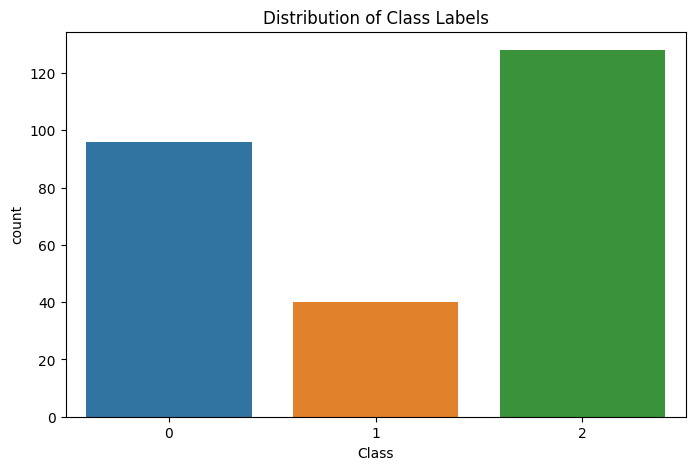

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Class Labels')
plt.show()

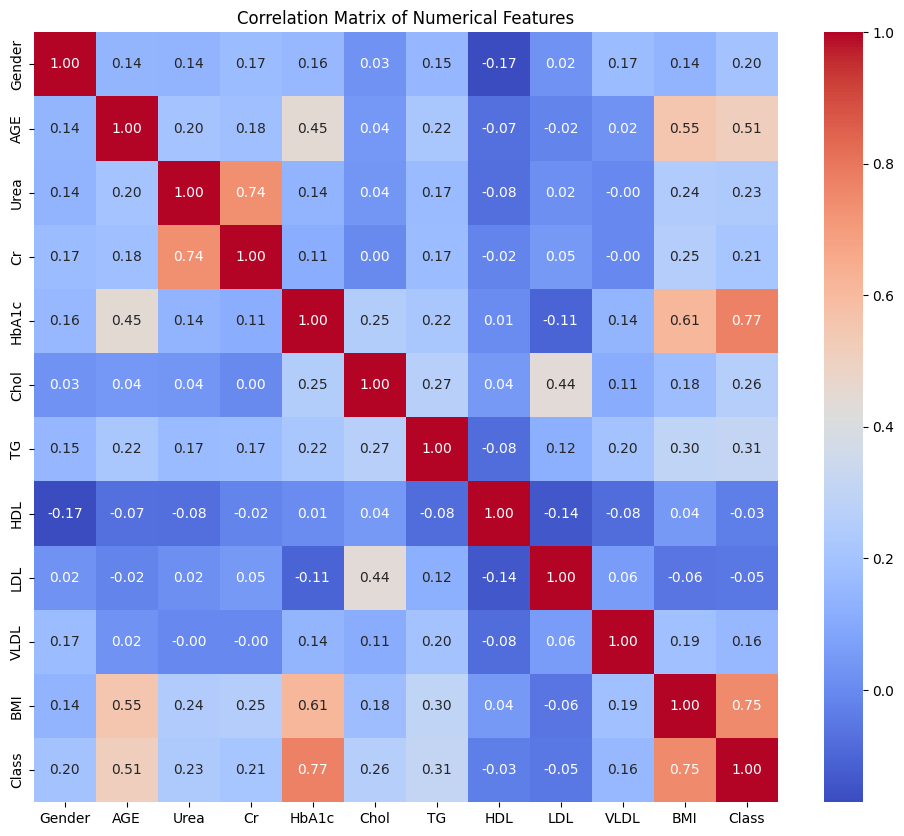

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [13]:
features = df.drop('Class', axis=1).columns
X = df[features]
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000), 
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True), 
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Neural Network (MLP)': MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
}

results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} trained.")

Training Logistic Regression...
Logistic Regression trained.
Training Decision Tree...
Decision Tree trained.
Training Random Forest...
Random Forest trained.
Training Support Vector Machine...
Support Vector Machine trained.
Training K-Nearest Neighbors...
K-Nearest Neighbors trained.
Training Gradient Boosting...
Gradient Boosting trained.
Training Neural Network (MLP)...
Neural Network (MLP) trained.


In [16]:
for name, model in models.items():
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    class_names = ['Normal', 'Prediabetes', 'Diabetes']
    cm = confusion_matrix(y_test, y_pred)
    class_report= classification_report(y_test, y_pred, target_names=class_names, zero_division=0)
    print("\nClassification Report:\n",class_report)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion Matrix': cm,
        'Classification Report': class_report
    }

    print(f"\n--- {name} Performance ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nConfusion Matrix:\n", cm)
    print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

      Normal       0.89      0.89      0.89        19
 Prediabetes       0.83      0.62      0.71         8
    Diabetes       0.89      0.96      0.93        26

    accuracy                           0.89        53
   macro avg       0.87      0.83      0.84        53
weighted avg       0.88      0.89      0.88        53


--- Logistic Regression Performance ---
Accuracy: 0.8868
Precision: 0.8845
Recall: 0.8868
F1-Score: 0.8828

Confusion Matrix:
 [[17  1  1]
 [ 1  5  2]
 [ 1  0 25]]

Classification Report:
               precision    recall  f1-score   support

      Normal       0.89      0.89      0.89        19
 Prediabetes       0.83      0.62      0.71         8
    Diabetes       0.89      0.96      0.93        26

    accuracy                           0.89        53
   macro avg       0.87      0.83      0.84        53
weighted avg       0.88      0.89      0.88        53


Classification Report:

In [17]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                              cv=5, n_jobs=-1, verbose=2, scoring='f1_weighted') 
grid_search_rf.fit(X_train, y_train)

print(f"\nBest parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best F1-Score for Random Forest: {grid_search_rf.best_score_:.4f}")

best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

print("\n--- Optimized Random Forest Performance ---")
print(classification_report(y_test, y_pred_best_rf, target_names=class_names, zero_division=0))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END 


Feature Importances (Random Forest):
    Feature  Importance
4    HbA1c    0.422639
10     BMI    0.253901
1      AGE    0.118563
5     Chol    0.037441
2     Urea    0.034825
9     VLDL    0.029822
3       Cr    0.029040
6       TG    0.028039
8      LDL    0.022379
7      HDL    0.018494
0   Gender    0.004858


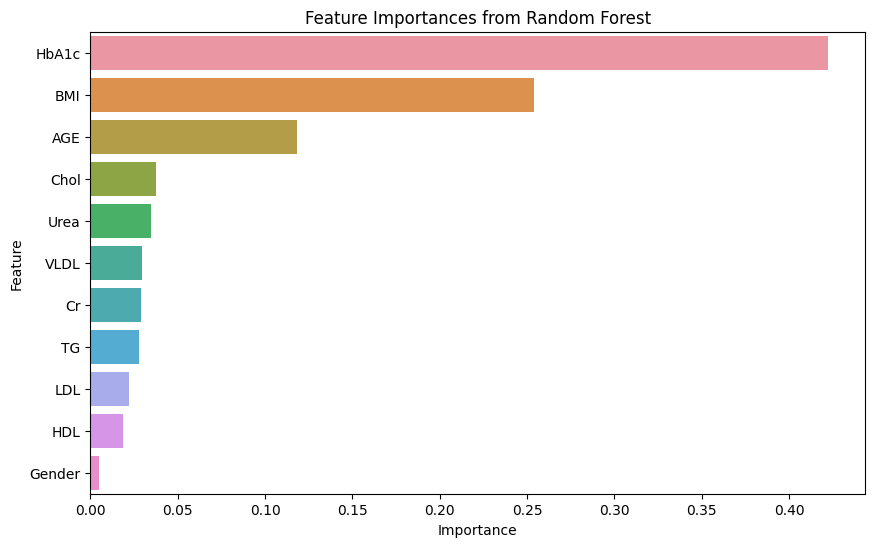

In [18]:
if 'Random Forest' in models:
    rf_model = models['Random Forest'] 
    importances = rf_model.feature_importances_
    feature_names = X_train.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print("\nFeature Importances (Random Forest):\n", feature_importance_df)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importances from Random Forest')
    plt.show()